**Introduction**

This project uses the Kaggle House Prices dataset to predict the sale price of houses based on different property features. The goal is to build regression models that estimate house prices using data such as overall quality, living area, and year built. Because the target variable, SalePrice, is continuous, regression is the appropriate approach. Understanding how various features affect housing prices can help identify key factors that drive value and improve decision-making in real estate.

**What is Regression?**

Regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It helps predict continuous outcomes, such as house prices, based on input features like square footage or overall quality. In linear regression, the model fits a straight line through the data that minimizes the difference between predicted and actual values. This allows us to estimate how much each feature contributes to the final prediction.

**Data Understanding**

Top correlations with SalePrice:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 



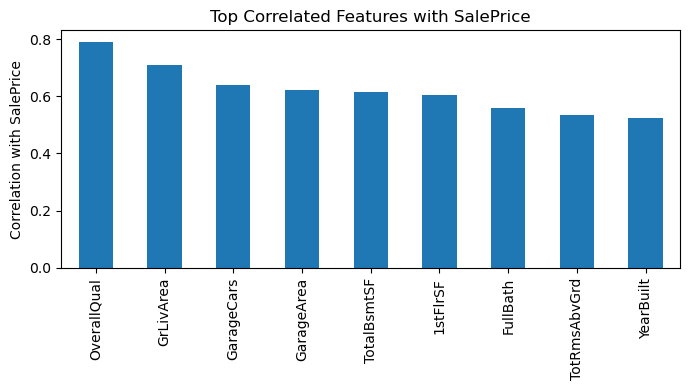

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load raw data for EDA
df = pd.read_csv("train.csv")
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# Top correlations with SalePrice
corr_series = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False).head(10)
print("Top correlations with SalePrice:\n", corr_series, "\n")

# Simple bar chart (clean and fast)
plt.figure(figsize=(7,4))
corr_series.drop('SalePrice').plot(kind='bar')
plt.ylabel('Correlation with SalePrice')
plt.title('Top Correlated Features with SalePrice')
plt.tight_layout()
plt.show()

**Data Cleaning and Preprocess**

The dataset contained missing values, non-numeric columns, and features with different scales. To prepare the data for modeling, I filled missing numeric values with their column means and replaced missing categorical values with the label “Missing.” Categorical features were encoded using a LabelEncoder so they could be interpreted numerically. Afterward, the dataset was split into training (80%) and testing (20%) subsets to evaluate model performance, and the features were standardized using a StandardScaler to help the models train more effectively.

In [13]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
# Load the dataset
df = pd.read_csv("train.csv")

# Drop the ID column if it exists
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# Fill missing numeric values with the column mean
df = df.fillna(df.mean(numeric_only=True))

# Fill missing categorical values with a placeholder
df = df.fillna('Missing')

# Encode all categorical columns
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col].astype(str))

# Split data into features and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Linear Regression Results ===")
print("MAE:", round(mae, 2))
print("MSE:", round(mse, 2))
print("R²:", round(r2, 4))


=== Linear Regression Results ===
MAE: 21687.38
MSE: 1197632941.51
R²: 0.8439


In [22]:
# Experiment 3: Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("=== Random Forest Regression Results ===")
print("MAE:", round(mae_rf, 2))
print("MSE:", round(mse_rf, 2))
print("R²:", round(r2_rf, 4))

=== Random Forest Regression Results ===
MAE: 17646.66
MSE: 814138696.81
R²: 0.8939


In [23]:
# Comparing model performance
results = {
    "Model": ["Linear Regression", "Ridge Regression", "Random Forest"],
    "MAE": [mae, mae_ridge, mae_rf],
    "MSE": [mse, mse_ridge, mse_rf],
    "R²": [r2, r2_ridge, r2_rf]
}

import pandas as pd
comparison = pd.DataFrame(results)
print(comparison)

               Model           MAE           MSE        R²
0  Linear Regression  21687.384107  1.197633e+09  0.843862
1   Ridge Regression  21589.935400  1.188769e+09  0.845017
2      Random Forest  17646.656370  8.141387e+08  0.893859


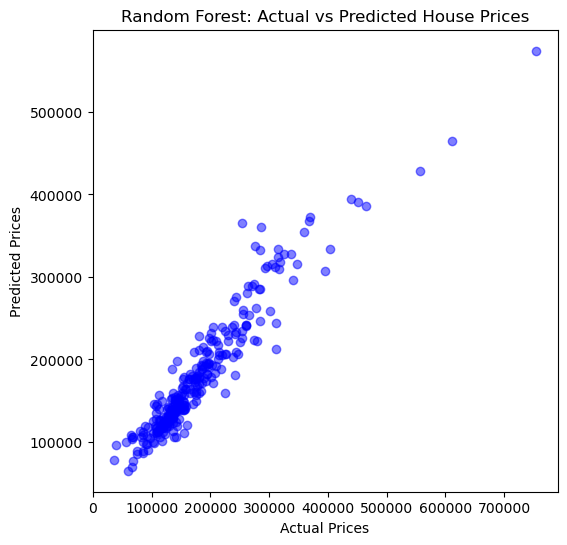

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted House Prices")
plt.show()

**Results and Discussion**

All three models performed well in predicting house prices. The Linear Regression model achieved an R² score of 0.84, which means it could explain about 84% of the price variability. The Ridge Regression model performed almost the same, slightly improving to 0.845, showing that regularization helped reduce overfitting a little.
The Random Forest Regression model performed the best overall with an R² of 0.89, the lowest MAE (≈ 17,466), and the lowest MSE, indicating that it made the most accurate predictions. The scatter plot also shows that its predicted prices closely follow the actual price trend. This improvement suggests that ensemble methods can better capture nonlinear patterns and complex relationships between housing features and prices.

**Conclusion** 

In this project, I compared three regression models to predict house prices using the Kaggle dataset. Each model was trained on the same cleaned and preprocessed data. The Random Forest model clearly outperformed the other two, showing that tree-based methods can handle complex data more effectively than basic linear models.
Through this project, I learned how different regression techniques handle data, how evaluation metrics measure model performance, and how preprocessing choices can impact results. If I continued this project, I would experiment with feature engineering, hyperparameter tuning, and cross-validation to further improve accuracy.

**Impact**


Predicting house prices can benefit buyers, sellers, and real estate professionals by providing data-driven insights into property values. However, using models trained on historical data could unintentionally reinforce existing market biases, such as neighborhood or socioeconomic disparities. This shows how data science can both support decision-making and raise questions about fairness and equity in housing.

**References**

Scikit-learn Documentation: https://scikit-learn.org/stable/
Kaggle House Prices Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques